# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import math
import scipy.stats as st
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('data/human_body_temperature.csv')
print(df.shape)
print(df.head())


(130, 3)
   temperature gender  heart_rate
0         99.3      F        68.0
1         98.4      F        81.0
2         97.8      M        73.0
3         99.2      F        66.0
4         98.0      F        73.0
98.24923076923078
98.3


1.** Is the distribution of body temperatures normal?**

###### Normality Test 

Plot histogram with temperature values

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


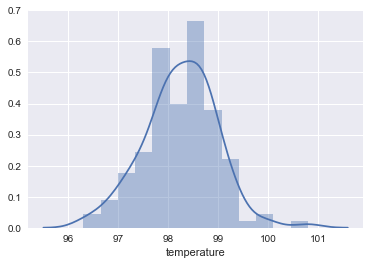

In [2]:
#Show a default plot with a kernel density estimate and histogram with bin size determined automatically 
sns.distplot(df.temperature)

#Normality test
print(st.normaltest(df.temperature))

The distribution does looks like normal distribution with sllightly skewed towards right.Normal test return chi-squared static and assosiated p-value.If the p-val is very small, it means it is unlikely that the data came from a normal distribution.Here, the p-value returned is quite high 25%.*** We can confidently say that the distribution of body temperatures is normal.***


In [3]:
n, x_bar, sigma, SE = np.zeros(4)

def inferential_statistics(array, print_output):
    ''' Generate statitics on given data set that can be used for inferential statistics.

    Parameters
    ==========
    array: ndarray
     object to generate statistics on
    '''
    infer = st.describe(array)
    
    n = infer[0]
    x_bar = infer[2]
    sigma = np.sqrt(infer[3])
    SE = sigma / np.sqrt(n)
    
    if print_output == 'print':
        print( "%14s %15s" % ('statistic', 'value'))
        print( 30 * "-")
        print( "%14s %15.0f" % ('sample size', n))
        print( "%14s %15.5f" % ('skew', infer[4]))
        print("%14s %15.5f" % ('kurtosis', infer[5]))
        print( "%14s %15.5f" % ('mean', x_bar))
        print( "%14s %15.5f" % ('median', np.median(array)))
        print( "%14s %15.5f" % ('std dev', sigma))
        print( "%14s %15.5f" % ('std error', SE))
    
    else:
        return n, x_bar, sigma, SE



**Would you use a one-sample or two-sample test? Why?**

I would use a one-sample test because we are trying to compare a sample group mean to the accepted population mean, and determining whether the sample group mean is unlikely to be found if the true population mean is 98.6 degrees F.

**In this situation, is it appropriate to use the t or  z statistic?  **

I would use the t statistic since the population's standard deviation is unknown.

In [6]:
# Calculates the T-test for the mean of ONE group of scores
print('t-statistic = %6.3f pvalue = %6.10f' %  st.ttest_1samp(df.temperature,98.6))


t-statistic = -5.455 pvalue = 0.0000002411


** Is the true population mean really 98.6 degrees F?  **

#### Test the Hypothesis

Ho (Null Hypothesis): μ (mu) = 98.6F : The population mean body temperature is 98.6 degrees Fahrenheit

Ha (Alternative Hypothesis): μ (mu) ≠ 98.6F : The population mean body temperature is not 98.6 degrees Fahrenheit

**Set Hypothesis:**



In [7]:
mu = 98.6
n, x_bar, sigma, SE = inferential_statistics(df.temperature, 'return')

print("H0: mu = " + str(mu) + " HA: mu != " + str(mu))

H0: mu = 98.6 HA: mu != 98.6


In [8]:
print("sample mean = %3.2f" % x_bar)

sample mean = 98.25


The sample mean is 98.25 but the true mean is 98.6.The true mean is far away from sample mean.Since we have strong evidence against Null Hypothesis we can reject the Null Hypothesis.

 **At what temperature should we consider someone's temperature to be "abnormal"? **
 
 Check CI for sample mean


In [9]:
lower, upper = st.t.interval(0.95, len(df['temperature'])-1, 
                             loc=np.mean(df['temperature']), 
                             scale=st.sem(df['temperature']))

print('The 95% confidence interval is ({:.2f}, {:.2f}).'.format(lower,upper))

The 95% confidence interval is (98.12, 98.38).


Considering the impacts of making a Type I error versus a Type II error, it seems that alpha = 0.05 is an acceptable balance between the two. We don't want to create such a high threshold for a confidence interval such that we reject the null when it is true and risk getting other people sick while we also do not want to make the mistake that people are sick when they are healthy. The risk of getting others sick is slightly worse. Given the confidence interval above of (98.12, 98.38), these temperatures could be used as a threshold for an "abnormal" temperature, but, depending on outside circumstances, these temperatures may not indicate sickness - just abnormality.


**Is there a significant difference between males and females in normal temperature?**


In [10]:
print(df.gender.value_counts())

#slice males
male_df = df[df['gender'] == 'M']
#slice female
female_df = df[df['gender'] == 'F']

#print mean temperature of males,mean temperature of females
print('There are {} males in the sample and their mean temperature is {:.2f}'.format(len(male_df), 
                                                                                     male_df['temperature'].mean()))
print('There are {} females in the sample and their mean temperature is {:.2f}'.format(len(female_df), 
                                                                                       female_df['temperature'].mean()))


M    65
F    65
Name: gender, dtype: int64
There are 65 males in the sample and their mean temperature is 98.10
There are 65 females in the sample and their mean temperature is 98.39


These two means seem to be different, so we should compare the male sample mean to the female sample mean.

H0: $M$m = $M$f

H1: $M$m ≠ $M$f


In [11]:
#t test for 2 groups(male,female)
two_sample = st.ttest_ind(male_df['temperature'], female_df['temperature'])
print('The t-statistic is %.3f and the p-value is %.3f.' % two_sample)

The t-statistic is -2.285 and the p-value is 0.024.


A two-sample t-test is more suitable than a one-sample t-test due to two groups. Given the low p-value it is unlikely that we found this sample due to random chance and therefore unlikely that the two mean temperatures are equal. This is a statistical significant in favour of alternative,we can confidently say that the male and female means are different.